In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Đọc dữ liệu từ file CSV
file_path1 = '/kaggle/input/dataset-pbl6-v5/data_v5/news_origin.csv'
data_new_df = pd.read_csv(file_path1)
# Đọc dữ liệu từ file CSV
file_path2 = '/kaggle/input/dataset-pbl6-v5/data_v5/fakenews_origin.csv'
data_fake_df = pd.read_csv(file_path2)
# Kiểm tra cấu trúc dữ liệu
print("Dữ liệu mẫu của tin thật gốc:\n",data_new_df.head())
print("\nDữ liệu mẫu của tin giả gốc:\n",data_fake_df.head())

Dữ liệu mẫu của tin thật gốc:
                                                Title  \
0  Tổng Bí thư, Chủ tịch nước Lào gặp hai nguyên ...   
1  Thủ tướng yêu cầu điều tiết hồ thủy điện, làm ...   
2  Tổng Bí thư, Chủ tịch nước Tô Lâm: Xác định cứ...   
3  Thủ tướng yêu cầu tìm địa điểm mới xây dựng th...   
4  Chủ tịch Quốc hội lội nước thăm người dân vùng...   

                                             Content  \
0  Tổng Bí thư, Chủ tịch nước Lào Thongloun Sisou...   
1  Công điện nêu, hoàn lưu bão số 3 gây mưa lớn t...   
2  Chiều 12/9, Tổng Bí thư, Chủ tịch nước Tô Lâm ...   
3  Chiều muộn ngày 12/9, ngay sau khi kết thúc ch...   
4  Làm việc với lãnh đạo tỉnh Thái Nguyên, Chủ tị...   

                                              Source Label  \
0  https://vietnamnet.vn/tong-bi-thu-chu-tich-nuo...  Real   
1  https://vietnamnet.vn/thu-tuong-yeu-cau-dieu-t...  Real   
2  https://vietnamnet.vn/tong-bi-thu-chu-tich-nuo...  Real   
3  https://vietnamnet.vn/thu-tuong-yeu-cau-tim-

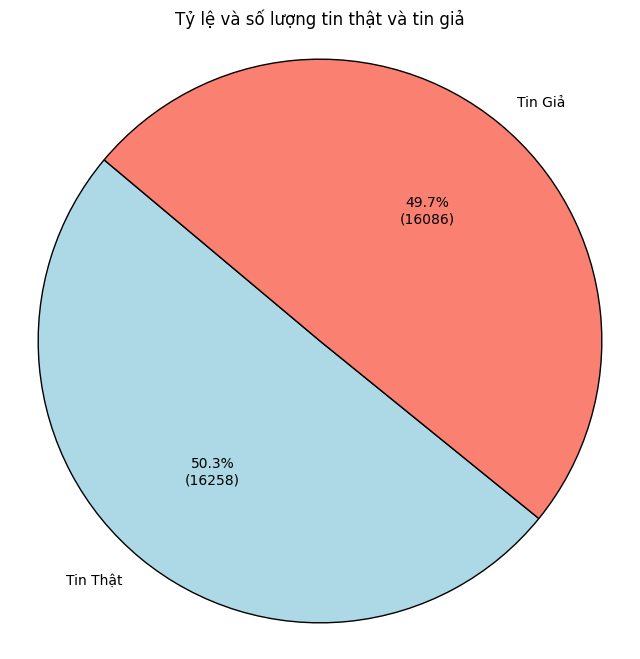

In [ ]:
news_count = len(data_new_df)
fake_count = len(data_fake_df)

# Danh sách số lượng và nhãn
counts = [news_count, fake_count]
labels = ['Tin Thật', 'Tin Giả']
# Hàm hiển thị cả phần trăm và số lượng
def autopct_with_count(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: autopct_with_count(pct, counts),
    startangle=140,
    colors=['lightblue', 'salmon'],
    wedgeprops={'edgecolor': 'black'}  # Thêm viền màu đen
)
plt.title('Tỷ lệ và số lượng tin thật và tin giả')
plt.axis('equal')  # Đảm bảo hình tròn không bị méo
plt.show()


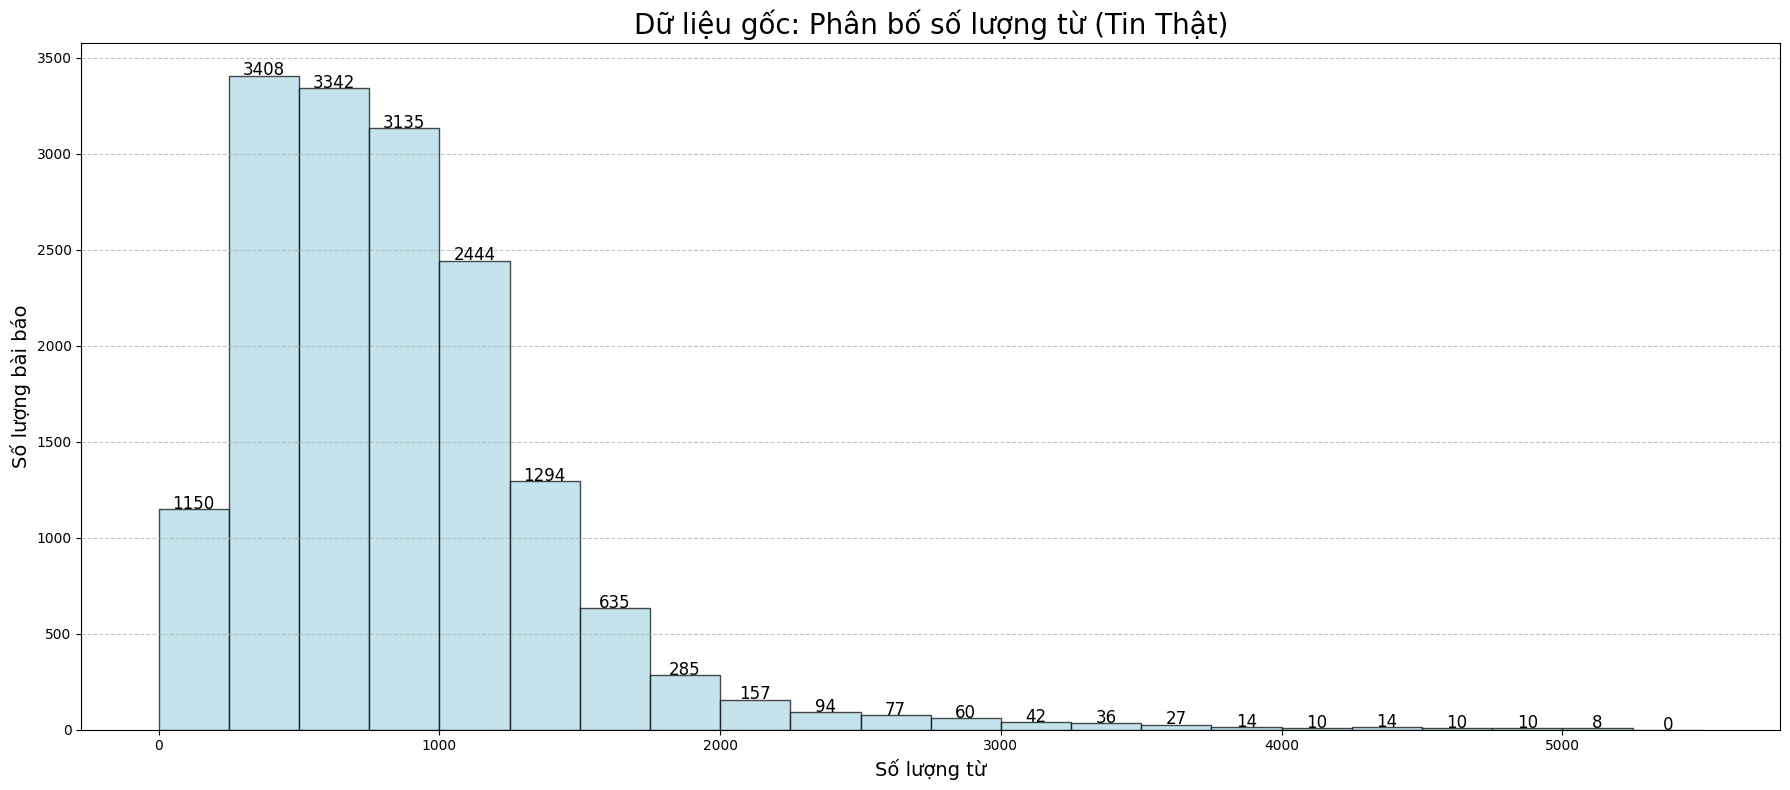

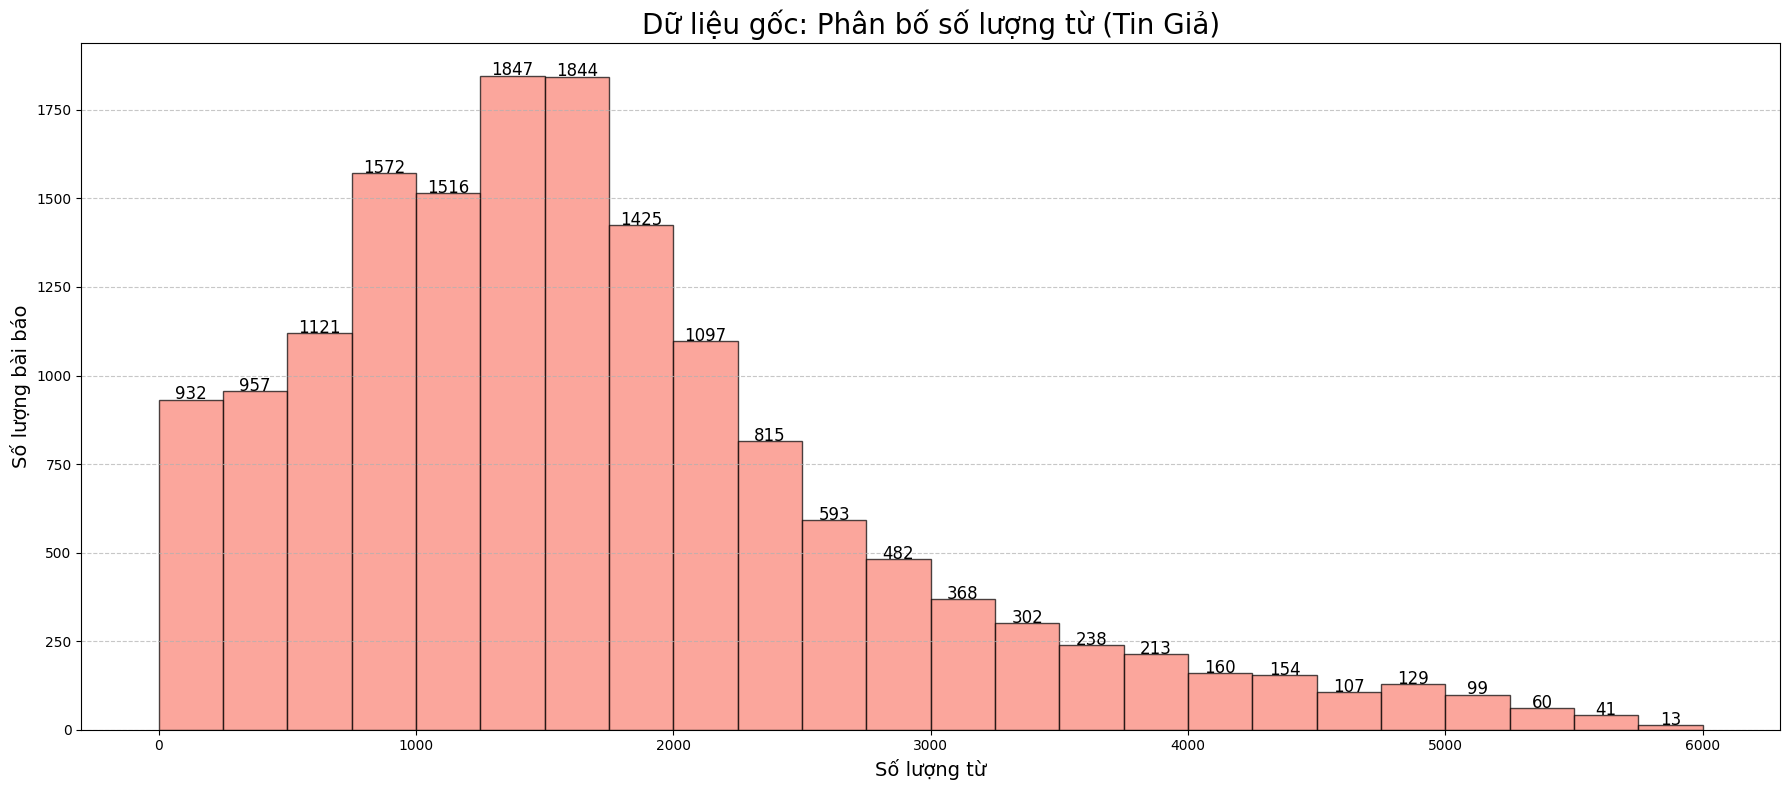

In [ ]:
# Hàm tính số lượng từ trong cột Content
def count_words(text):
    return len(str(text).split())

# Tính số lượng từ cho mỗi bài báo trong cả hai tập dữ liệu
data_new_df['WordCount'] = data_new_df['Content'].apply(count_words)
data_fake_df['WordCount'] = data_fake_df['Content'].apply(count_words)

# Vẽ biểu đồ phân bố cho tin thật và tin giả
plt.figure(figsize=(18, 8))  # Tạo kích thước biểu đồ

# Biểu đồ cho tập tin thật
max_word_count = max(data_new_df['WordCount'])
bins = range(0, max_word_count + 50, 250)  # Khoảng giá trị cho từng bin
bin_width = bins[1] - bins[0]  # Độ rộng của mỗi cột

# Tạo histogram với độ rộng cột được điều chỉnh
hist, edges, _ = plt.hist(data_new_df['WordCount'], bins=bins, alpha=0.7, color='lightblue', edgecolor='black', width=bin_width)
plt.title('Dữ liệu gốc: Phân bố số lượng từ (Tin Thật)', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bài báo', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng bài báo trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ cho tập tin giả
plt.figure(figsize=(18, 8))
max_word_count_fake = max(data_fake_df['WordCount'])
bins_fake = range(0, max_word_count_fake + 50, 250)  # Khoảng giá trị cho từng bin
bin_width_fake = bins_fake[1] - bins_fake[0]  # Độ rộng của mỗi cột

# Tạo histogram với độ rộng cột được điều chỉnh
hist, edges, _ = plt.hist(data_fake_df['WordCount'], bins=bins_fake, alpha=0.7, color='salmon', edgecolor='black', width=bin_width_fake)
plt.title('Dữ liệu gốc: Phân bố số lượng từ (Tin Giả)', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bài báo', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng bài báo trên đầu mỗi cột và xoay số liệu theo trục x
for i in range(len(hist)):
    plt.text(edges[i] + bin_width_fake / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

Số lượng từ tất cả của dữ liệu tin thật gốc:  14160400
Số lượng từ trong từ điển từ của dữ liệu tin thật gốc:  122724


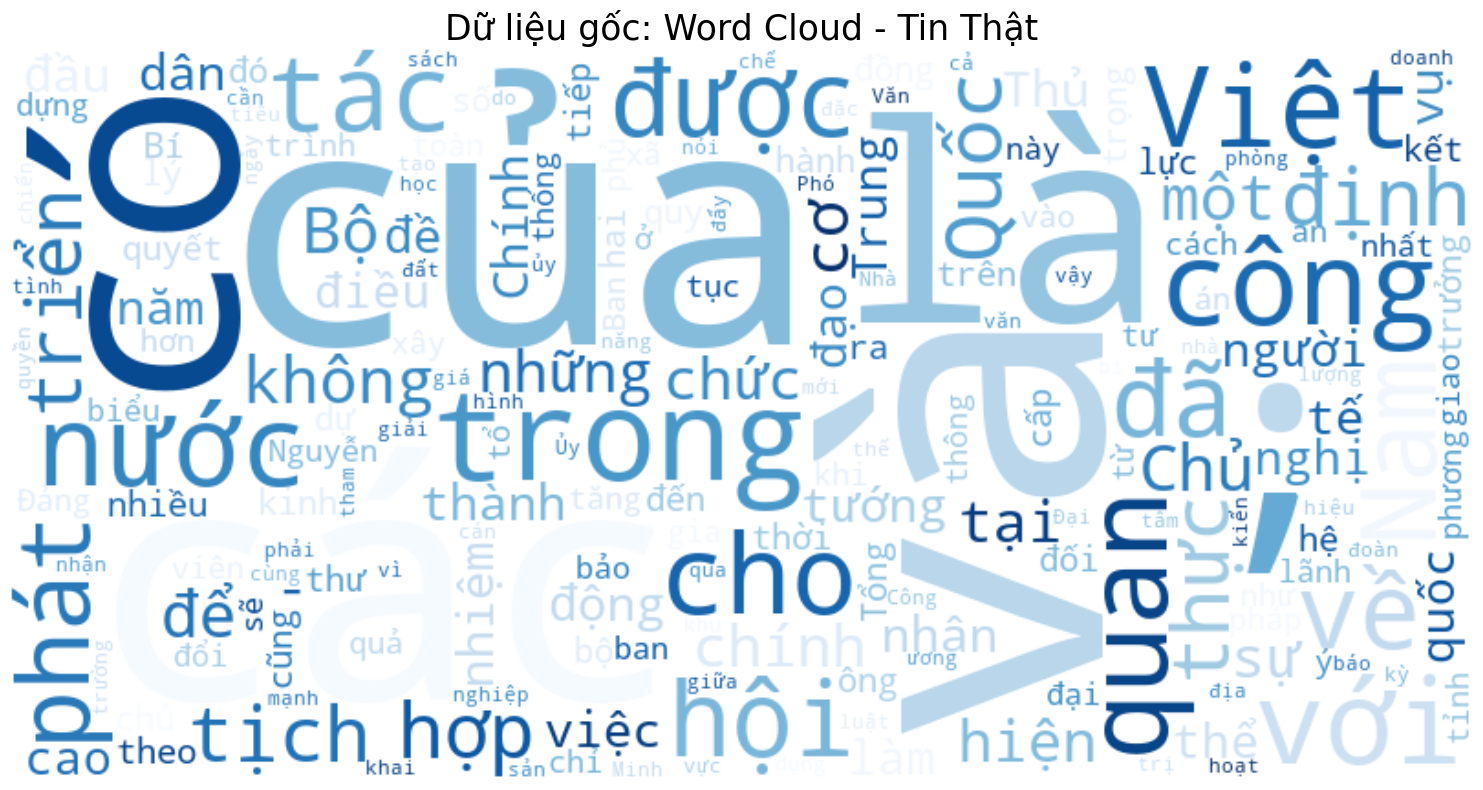

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['Title'].dropna())+ ' ' + ' '.join(batch['Content'].dropna()) )
    return ' '.join(combined_text)

# Kết hợp dữ liệu từng phần
text_real = combine_text_in_batches(data_new_df)
word_frequencies = Counter(text_real.split())
print("Số lượng từ tất cả của dữ liệu tin thật gốc: ",len(text_real.split()))
print("Số lượng từ trong từ điển từ của dữ liệu tin thật gốc: ",len(word_frequencies))
# Tạo word cloud cho tin thật
# Cấu hình WordCloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_frequencies)

# Vẽ Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Dữ liệu gốc: Word Cloud - Tin Thật', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()

Số lượng từ tất cả của dữ liệu tin giả gốc:  27280212
Số lượng từ trong từ điển từ của dữ liệu tin giả gốc:  209627


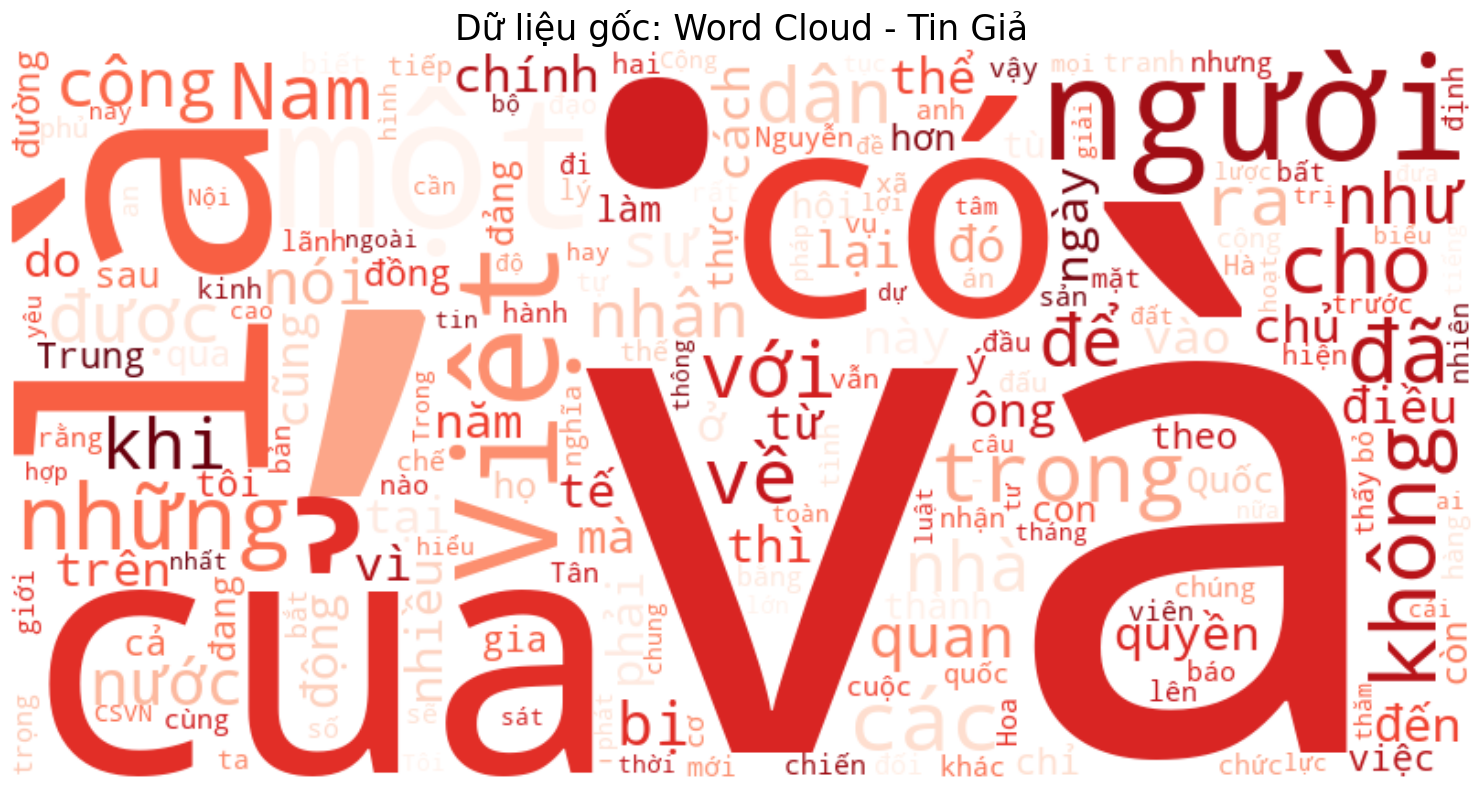

In [ ]:
# Tạo word cloud cho tin giả
# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['Title'].dropna())+ ' ' + ' '.join(batch['Content'].dropna()) )
    return ' '.join(combined_text)

# Kết hợp tất cả nội dung bài báo tin giả thành một chuỗi
text_fake = combine_text_in_batches(data_fake_df)
word_frequencies1 = Counter(text_fake.split())
print("Số lượng từ tất cả của dữ liệu tin giả gốc: ",len(text_fake.split()))
print("Số lượng từ trong từ điển từ của dữ liệu tin giả gốc: ",len(word_frequencies1))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_frequencies1)

# Vẽ Word Cloud cho tin giả
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Dữ liệu gốc: Word Cloud - Tin Giả', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()


**Trực quan dữ liệu đã tiền xử lý**

In [ ]:
# Đọc dữ liệu từ file CSV process
file_path1 = '/kaggle/input/dataset-pbl6-v5/data_v5/news_process.csv'
data_process_new_df = pd.read_csv(file_path1)
# Đọc dữ liệu từ file CSV
file_path2 = '/kaggle/input/dataset-pbl6-v5/data_v5/fakenews_process.csv'
data_process_fake_df = pd.read_csv(file_path2)
# Kiểm tra cấu trúc dữ liệu
print("\nTin thật đã xử lý:\n",data_process_new_df.head())
print("\nTin giả đã xử lý:\n",data_process_fake_df.head())


Tin thật đã xử lý:
                                                Title  \
0  tổng_bí_thư chủ_tịch lào hai nguyên chủ_tịch v...   
1  thủ_tướng yêu_cầu điều_tiết hồ thủy_điện chậm ...   
2  tổng_bí_thư chủ_tịch tô_lâm xác_định cứu dân ư...   
3  thủ_tướng yêu_cầu địa_điểm xây_dựng thôn_làng ...   
4  chủ_tịch quốc_hội lội thăm người_dân rốn lũ th...   

                                             Content  \
0  tổng_bí_thư chủ_tịch lào thongloun sisoulith v...   
1  công_điện nêu hoàn_lưu bão 3 mưa toàn_bộ tỉnh ...   
2  chiều 12/ 9 tổng_bí_thư chủ_tịch tô_lâm đoàn c...   
3  chiều muộn 12/ 9 kết_thúc chương_trình làm_việ...   
4  làm_việc lãnh_đạo tỉnh thái_nguyên chủ_tịch qu...   

                                              Source Label  \
0  https://vietnamnetvn/tong-bi-thu-chu-tich-nuoc...  Real   
1  https://vietnamnetvn/thu-tuong-yeu-cau-dieu-ti...  Real   
2  https://vietnamnetvn/tong-bi-thu-chu-tich-nuoc...  Real   
3  https://vietnamnetvn/thu-tuong-yeu-cau-tim-dia...  Rea

**Biểu đồ phân bố số lượng từ với các bài báo trong data**

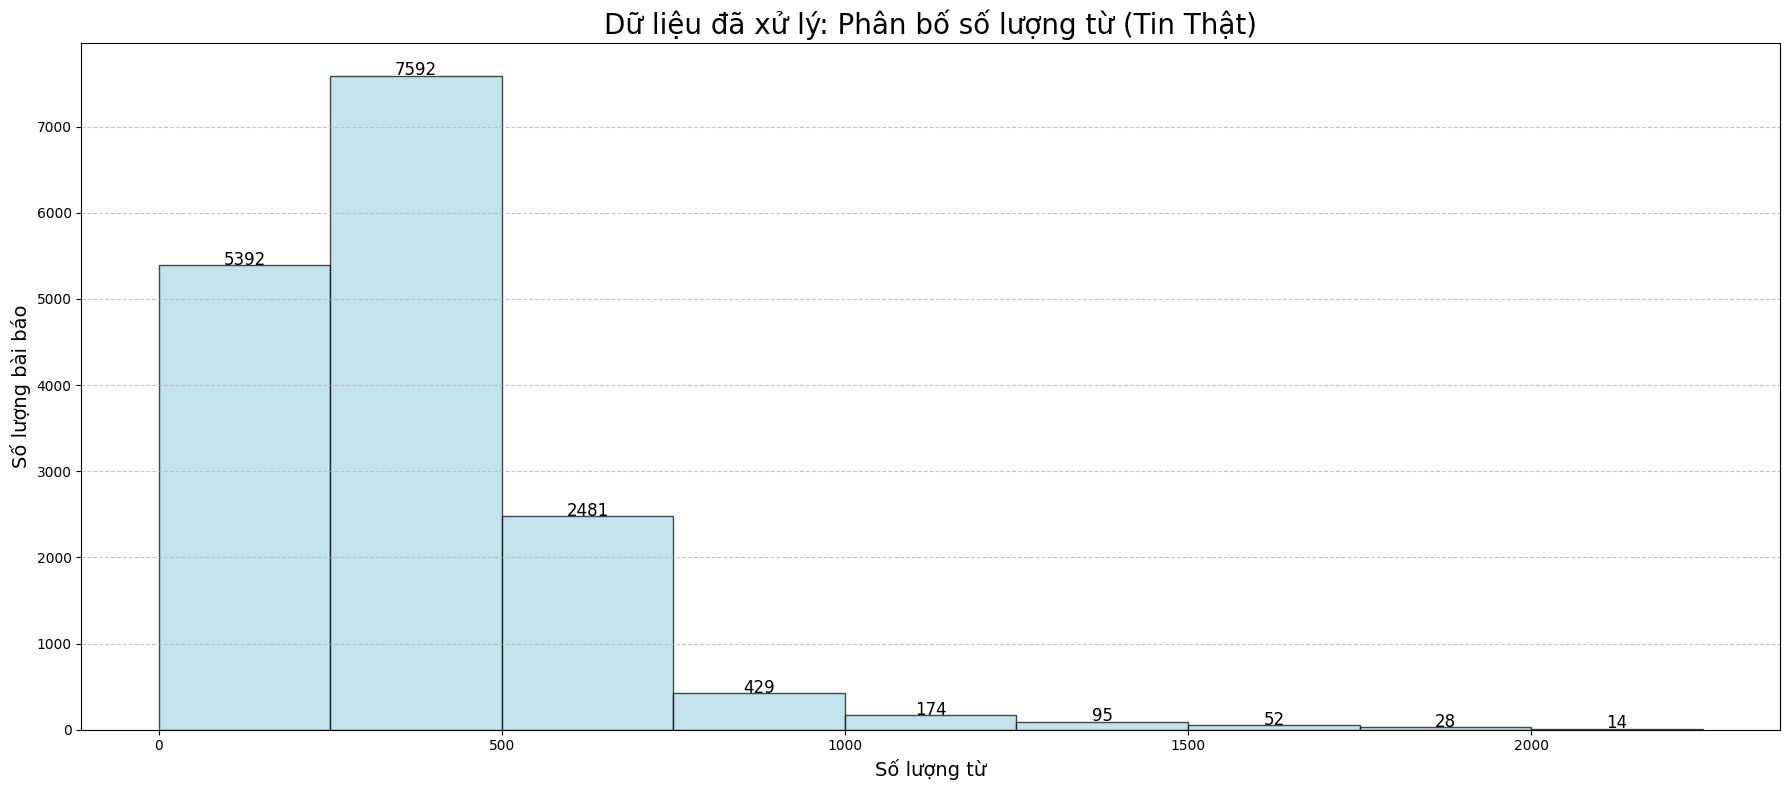

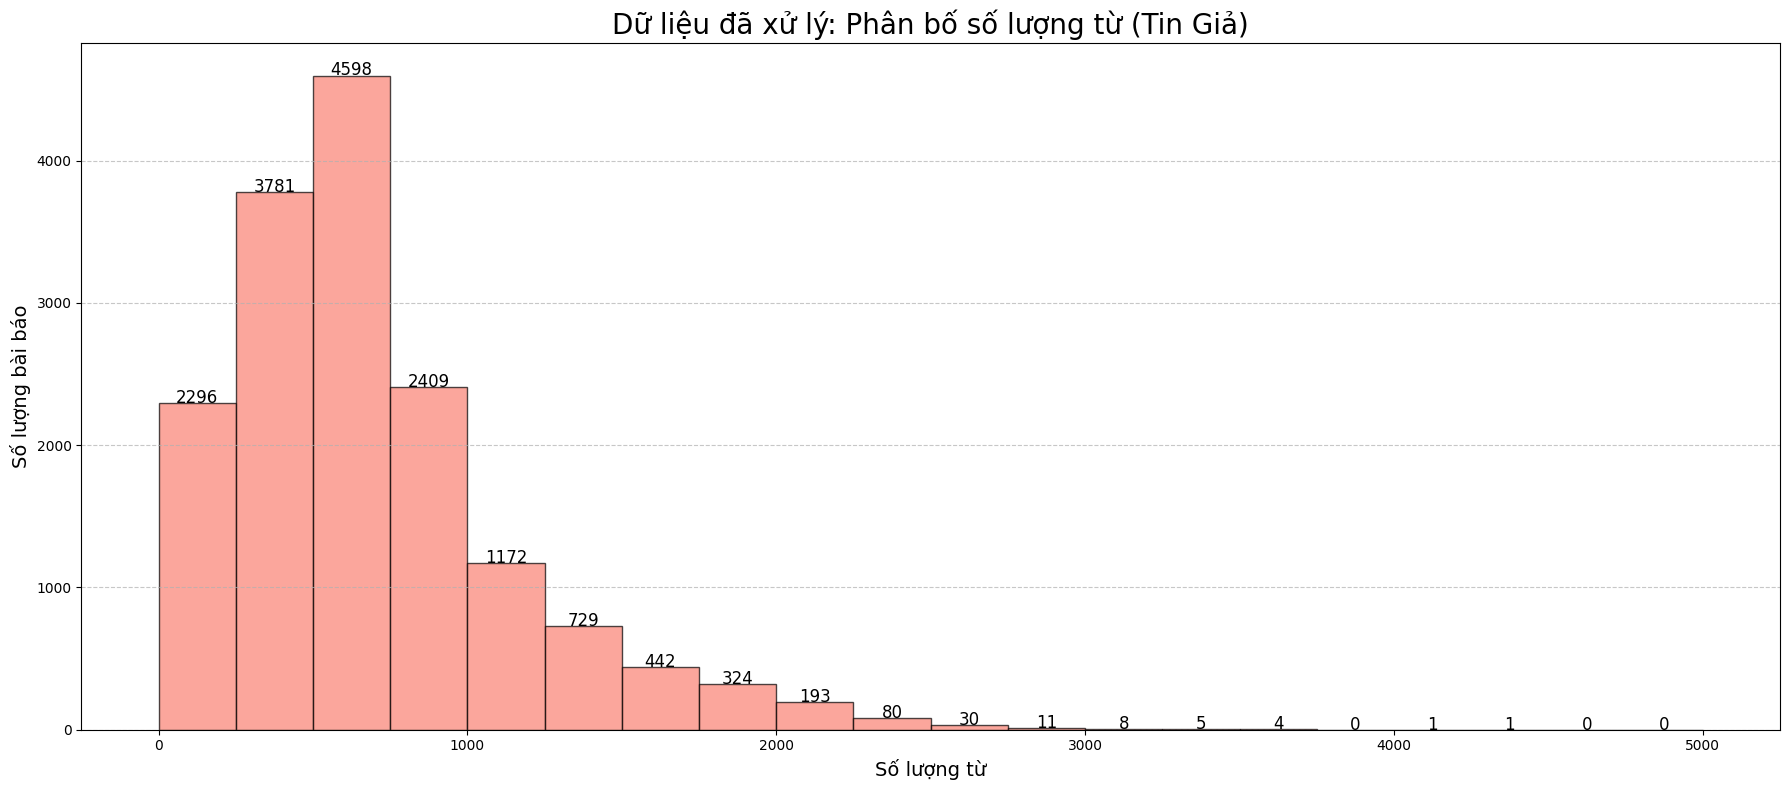

In [ ]:
# Hàm tính số lượng từ trong cột Content
def count_words(text):
    return len(str(text).split())

# Tính số lượng từ cho mỗi bài báo trong cả hai tập dữ liệu
data_process_new_df['WordCount'] = data_process_new_df['Content'].apply(count_words)
data_process_fake_df['WordCount'] = data_process_fake_df['Content'].apply(count_words)

# Vẽ biểu đồ phân bố cho tin thật và tin giả
plt.figure(figsize=(18, 8))  # Tạo kích thước biểu đồ

# Biểu đồ cho tập tin thật
max_word_count = max(data_process_new_df['WordCount'])
bins = range(0, max_word_count + 50, 250)  # Khoảng giá trị cho từng bin
bin_width = bins[1] - bins[0]  # Độ rộng của mỗi cột
hist, edges, _ = plt.hist(data_process_new_df['WordCount'], bins=bins, alpha=0.7, color='lightblue', edgecolor='black', width=bin_width)
plt.title('Dữ liệu đã xử lý: Phân bố số lượng từ (Tin Thật)', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bài báo', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng bài báo trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show

plt.figure(figsize=(18, 8))
max_word_count_fake = max(data_process_fake_df['WordCount'])
bins_fake = range(0, max_word_count_fake + 50, 250)  # Khoảng giá trị cho từng bin
bin_width_fake = bins_fake[1] - bins_fake[0]  # Độ rộng của mỗi cột
hist, edges, _ = plt.hist(data_process_fake_df['WordCount'], bins=bins_fake, alpha=0.7, color='salmon', edgecolor='black', width=bin_width_fake)
plt.title('Dữ liệu đã xử lý: Phân bố số lượng từ (Tin Giả)', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bài báo', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng bài báo trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width_fake / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Số lượng từ tất cả của dữ liệu tin thật đã xử lý:  6085980
Số lượng từ trong từ điển từ của dữ liệu tin thật đã xử lý:  65791


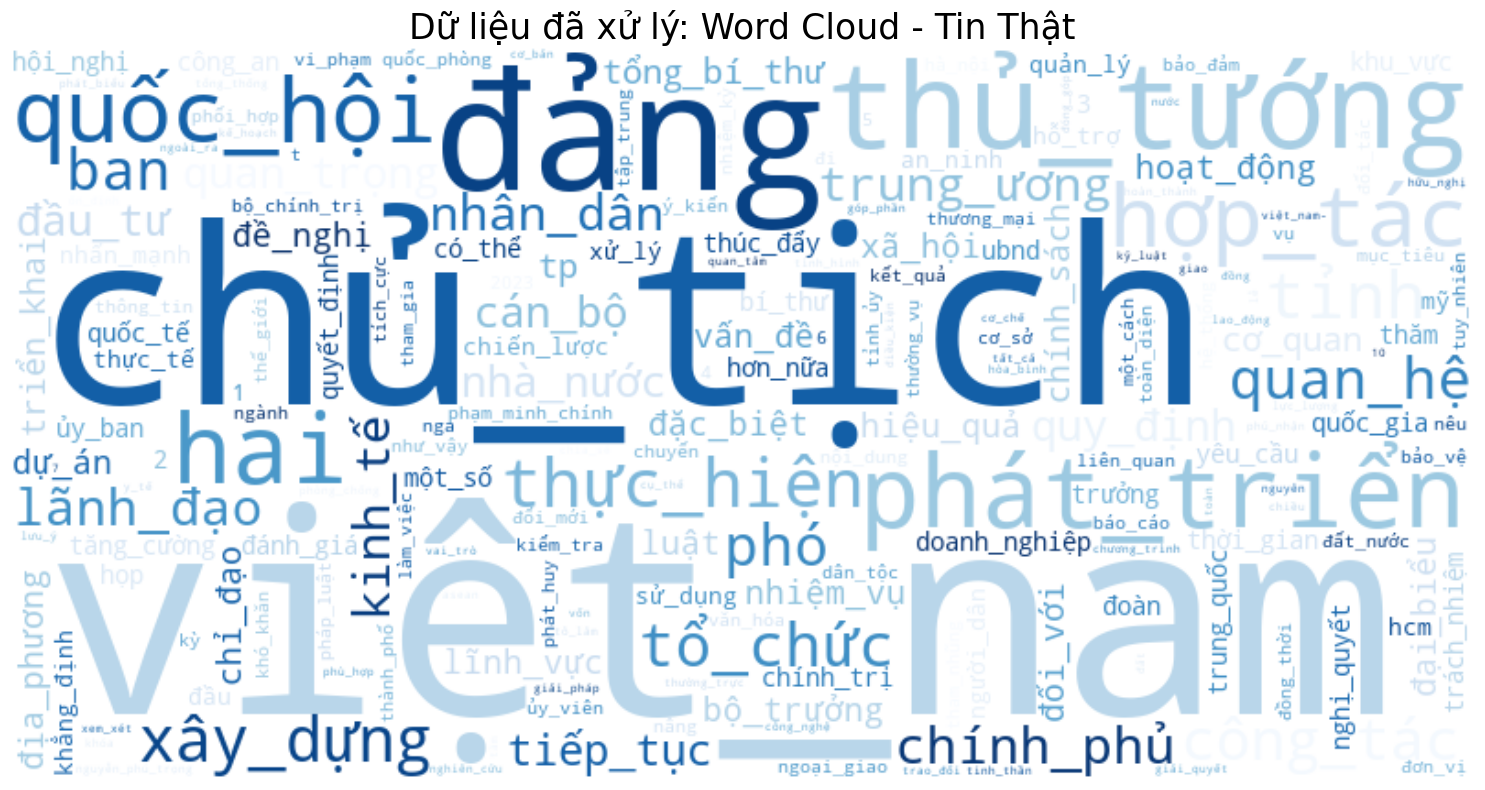

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['Title'].dropna())+ ' ' + ' '.join(batch['Content'].dropna()) )
    return ' '.join(combined_text)

# Kết hợp dữ liệu từng phần
text_real = combine_text_in_batches(data_process_new_df)
word_frequencies = Counter(text_real.split())
print("Số lượng từ tất cả của dữ liệu tin thật đã xử lý: ",len(text_real.split()))
print("Số lượng từ trong từ điển từ của dữ liệu tin thật đã xử lý: ",len(word_frequencies))
# Tạo word cloud cho tin thật
# Cấu hình WordCloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_frequencies)

# Vẽ Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Dữ liệu đã xử lý: Word Cloud - Tin Thật', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()

Số lượng từ tất cả của dữ liệu tin giả đã xử lý:  11108266
Số lượng từ trong từ điển từ của dữ liệu tin giả đã xử lý:  131850


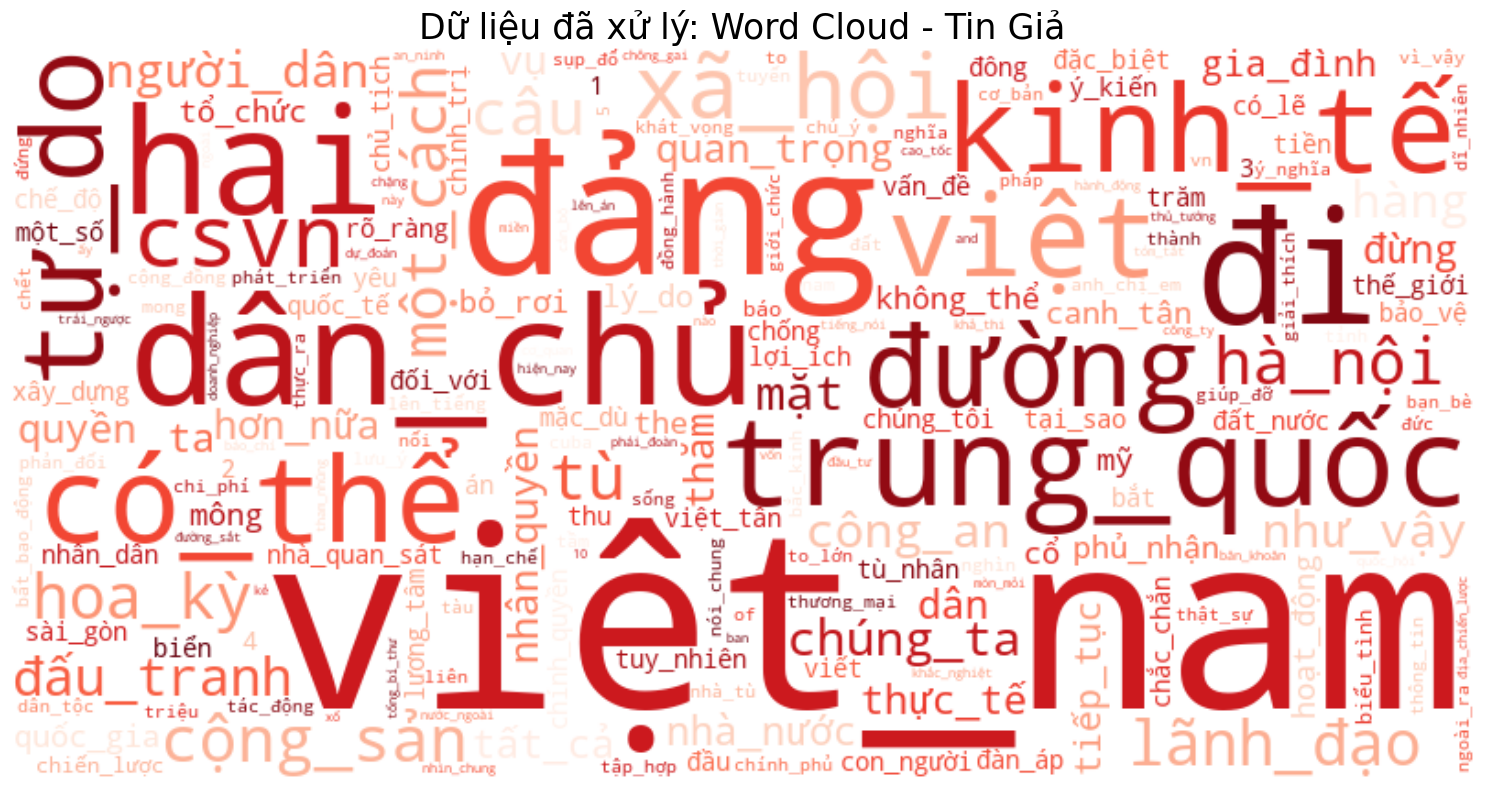

In [ ]:
# Tạo word cloud cho tin giả
# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['Title'].dropna())+ ' ' + ' '.join(batch['Content'].dropna()) )
    return ' '.join(combined_text)

# Kết hợp tất cả nội dung bài báo tin giả thành một chuỗi
text_fake = combine_text_in_batches(data_process_fake_df)
word_frequencies1 = Counter(text_fake.split())
print("Số lượng từ tất cả của dữ liệu tin giả đã xử lý: ",len(text_fake.split()))
print("Số lượng từ trong từ điển từ của dữ liệu tin giả đã xử lý: ",len(word_frequencies1))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_frequencies1)

# Vẽ Word Cloud cho tin giả
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Dữ liệu đã xử lý: Word Cloud - Tin Giả', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()
